In [1]:
import pandas as pd
import sklearn
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('files/Customer-Churn.csv')
df.shape

(7043, 21)

analysis

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.size

147903

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
### cleaning

In [11]:
df['TotalCharges'].dtype

dtype('O')

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [13]:
df['TotalCharges'].dtype

dtype('float64')

In [14]:
categorical_features =[
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',  
]

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

target= 'Churn'

In [15]:
#stadistical distribution 
df.skew(numeric_only=True)

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [16]:
df.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [17]:
df[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

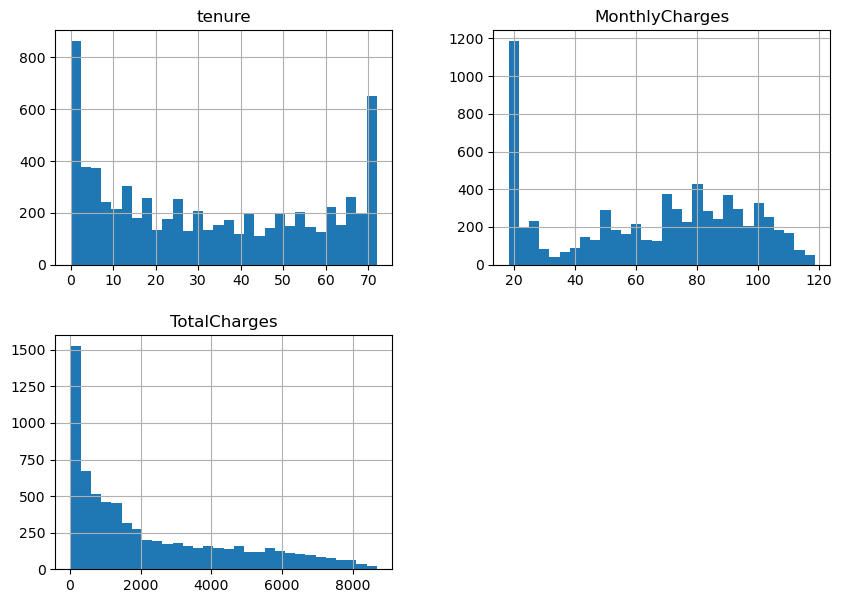

In [18]:
df[numerical_features].hist(bins=30, figsize=(10,7))

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>,
       <Axes: title={'center': 'TotalCharges'}>], dtype=object)

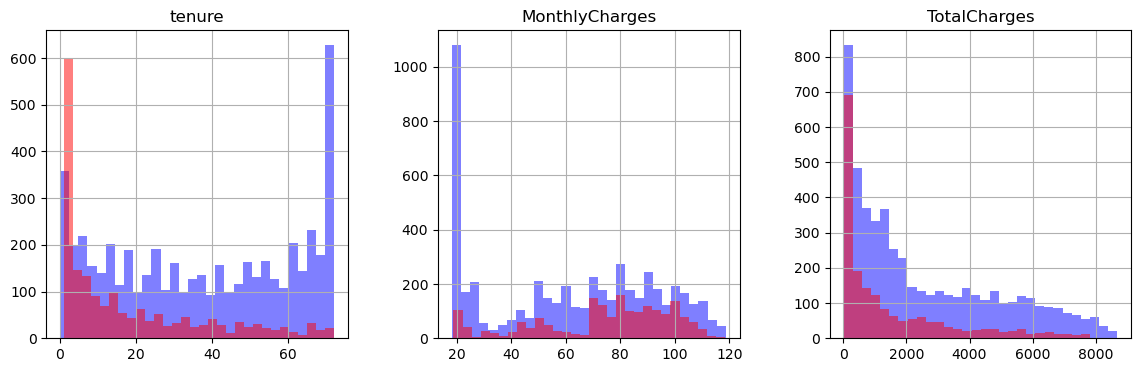

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(14,4))
df[df['Churn'] == 'No'][numerical_features].hist(bins=30, color='Blue', alpha=0.5, ax=ax)
df[df['Churn'] == 'Yes'][numerical_features].hist(bins=30, color='Red', alpha=0.5, ax=ax)

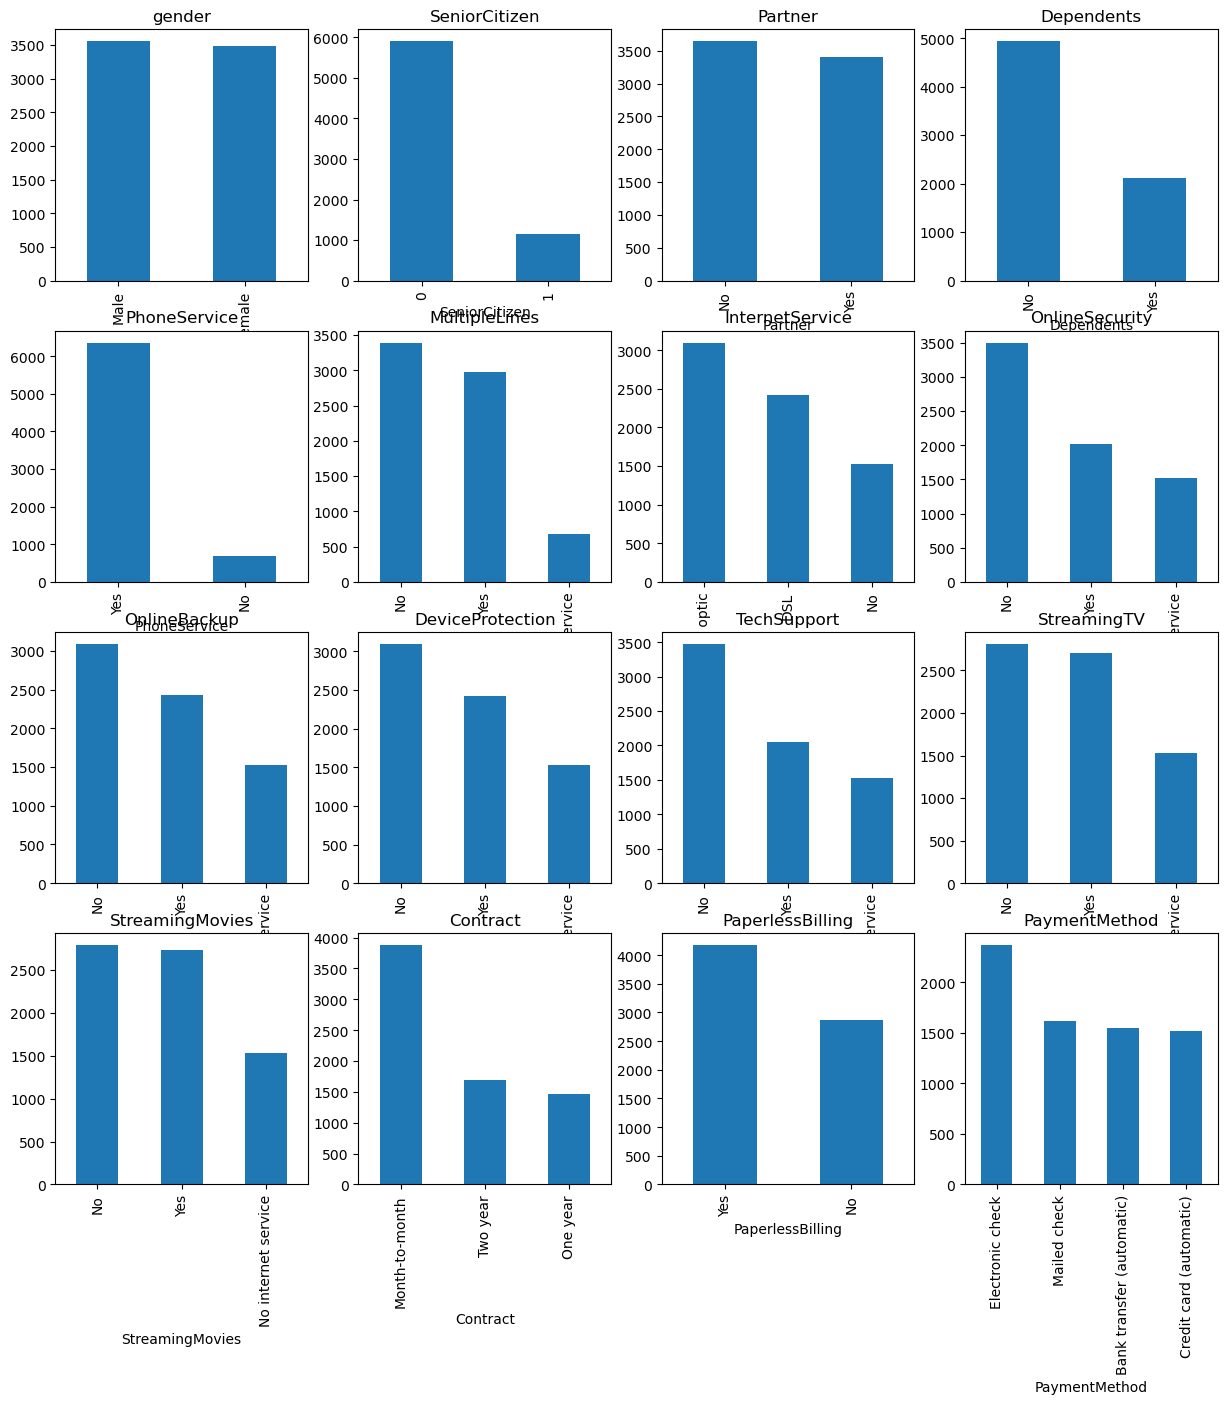

In [20]:
ROWS, COLS = 4,4
fig, ax = plt.subplots(ROWS, COLS, figsize = (15,15))
row, col = 0, 0,
for i, categorical in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical].value_counts().plot(kind='bar', ax=ax[row, col]).set_title(categorical)

Text(0.5, 1.0, 'not churned')

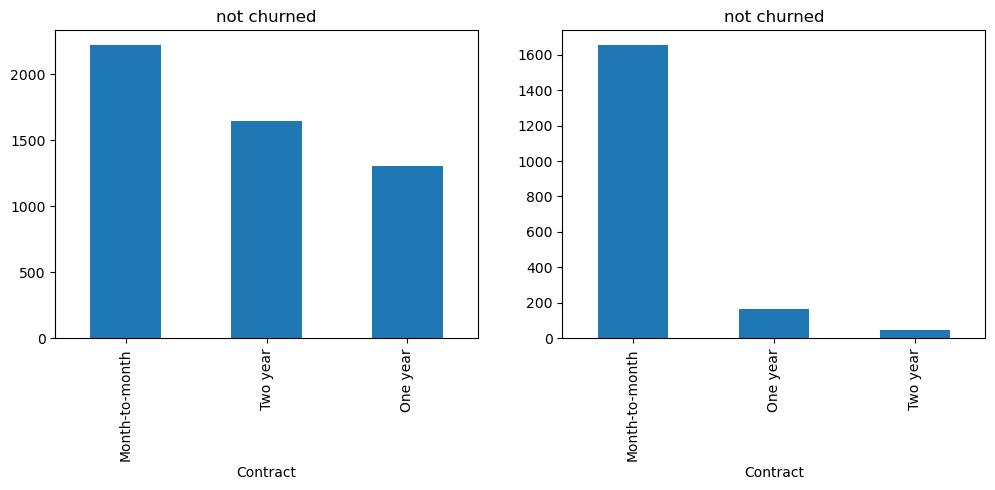

In [21]:
feature = 'Contract'
fig, ax = plt.subplots(1, 2, figsize = (12,4))
df[df.Churn == 'No'][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('not churned')
df[df.Churn == 'Yes'][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('not churned')

Text(0.5, 1.0, 'churned')

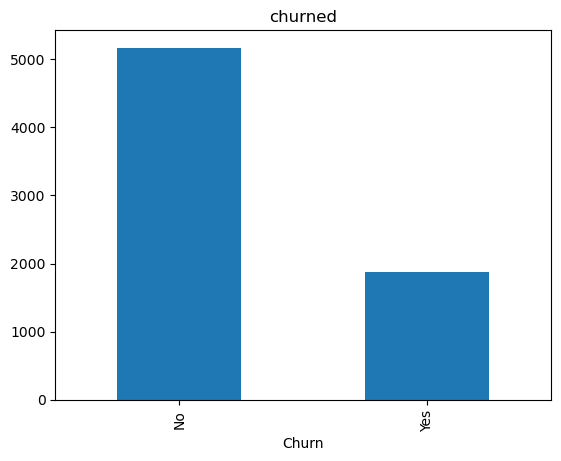

In [22]:
df[target].value_counts().plot(kind='bar').set_title('churned')

In [23]:
# contar los outlier

x = ['tenure', 'MonthlyCharges']

def outlier(data, col):
    q1 = data[col].quantile(0.25, interpolation='nearest')
    q2 = data[col].quantile(0.5, interpolation='nearest')
    q3 = data[col].quantile(0.75, interpolation='nearest')
    q4 = data[col].quantile(1, interpolation='nearest')
    IQR = q3 - q1
    global LLP
    global ULP
    LLP = q1 - 1.5 * IQR
    ULP = q3 + 1.5 * IQR
    if data[col].min() > LLP and data[col].max() < ULP:
        print('no outlies ', i)
    else:
        print('There are outliers in ', i)
        #x = data[data[col] < LLP][col].size
        #y = data[data[col] > ULP][col].size
        a.append(i)
        #print('count of outliers are: ', x+y)
        
global a
a = []

for i in x:
    outlier(df,i)

no outlies  tenure
no outlies  MonthlyCharges


In [24]:
df.drop(['customerID'], axis = 1, inplace = True)

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
df1 = pd.get_dummies(data=df, columns =[
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod', 'Churn'], drop_first=True)

In [27]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [28]:
df1['TotalCharges'].isnull().sum()

11

In [29]:
from sklearn.impute import SimpleImputer

#imputer reemplaza valores con un promedio
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

df1['TotalCharges'] = imputer.fit_transform(df1['TotalCharges'].values.reshape(-1,1))


## scaling

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

scaler.fit(df1.drop(['Churn_Yes'], axis = 1))
scaled_features = scaler.transform(df1.drop('Churn_Yes', axis = 1))

In [32]:
scaled_features

array([[-0.43991649, -1.27744458, -1.16032292, ..., -0.52504733,
         1.40641839, -0.54480692],
       [-0.43991649,  0.06632742, -0.25962894, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [-0.43991649, -1.23672422, -0.36266036, ..., -0.52504733,
        -0.71102597,  1.83551265],
       ...,
       [-0.43991649, -0.87024095, -1.1686319 , ..., -0.52504733,
         1.40641839, -0.54480692],
       [ 2.27315869, -1.15528349,  0.32033821, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [-0.43991649,  1.36937906,  1.35896134, ..., -0.52504733,
        -0.71102597, -0.54480692]])

## selection

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x = scaled_features
y = df1['Churn_Yes']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 40)


## logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [36]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [37]:
predLR = log_model.predict(x_test)

In [38]:
print(classification_report(y_test, predLR))

              precision    recall  f1-score   support

       False       0.84      0.88      0.86      1553
        True       0.61      0.53      0.57       560

    accuracy                           0.79      2113
   macro avg       0.72      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



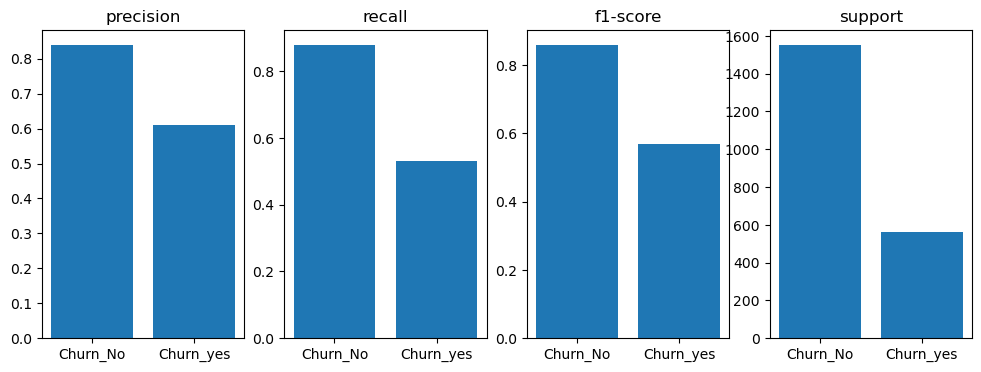

In [39]:
#classification raport
report = classification_report(y_test, predLR, target_names = ['Churn_No', 'Churn_yes'])

#split the report into lines
lines = report.split('\n')

#split each line into parts
parts = [line.split() for line in lines[2:-5]]

#extract the metrics for each clans
class_metrics = dict()
for part in parts:
    class_metrics[part[0]] = {'precision': float(part[1]), 'recall': float(part[2]),
                             'f1-score': float(part[3]), 'support': float(part[4])}
    
fig, ax = plt.subplots(1,4, figsize=(12,4))
metrics = ['precision', 'recall', 'f1-score', 'support']

for i,  metric in enumerate(metrics):
    ax[i].bar(class_metrics.keys(),[class_metrics[key][metric] for key in class_metrics.keys()])
    ax[i].set_title(metric)
    
plt.show()

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

In [41]:
confusion_matrix_LR = confusion_matrix(y_test, predLR)

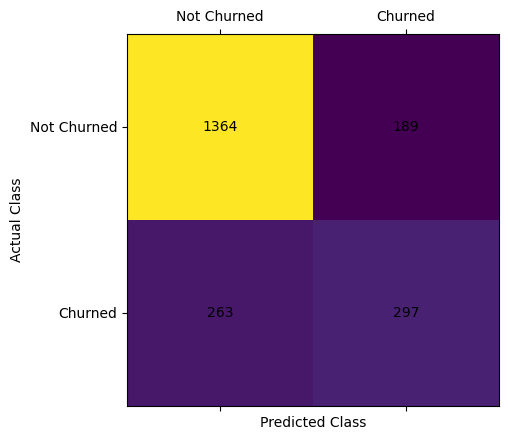

In [42]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix(y_test, predLR))

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_LR[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [43]:


log_model.score(x_train, y_train)


0.8137931034482758

In [44]:

accuracy_score(y_test, predLR)

0.7860861334595362

In [45]:
import tensorflow as tf
from tensorflow import keras

In [46]:
x_test.shape

(2113, 30)

In [47]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(30,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)



Epoch 1/100


155/155 [==============================] - 2s 2ms/step - loss: 0.5025 - accuracy: 0.7359
Epoch 2/100
155/155 [==============================] - 0s 3ms/step - loss: 0.4279 - accuracy: 0.7957
Epoch 3/100
155/155 [==============================] - 0s 1ms/step - loss: 0.4168 - accuracy: 0.8067
Epoch 4/100
155/155 [==============================] - 0s 1ms/step - loss: 0.4118 - accuracy: 0.8059
Epoch 5/100
155/155 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.8077
Epoch 6/100
155/155 [==============================] - 0s 1ms/step - loss: 0.4051 - accuracy: 0.8099
Epoch 7/100
155/155 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8105
Epoch 8/100
155/155 [==============================] - 0s 1ms/step - loss: 0.4009 - accuracy: 0.8118
Epoch 9/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3991 - accuracy: 0.8140
Epoch 10/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3972 - ac

155/155 [==============================] - 0s 1ms/step - loss: 0.3430 - accuracy: 0.8383
Epoch 74/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3413 - accuracy: 0.8436
Epoch 75/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3443 - accuracy: 0.8432
Epoch 76/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3416 - accuracy: 0.8426
Epoch 77/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3405 - accuracy: 0.8394
Epoch 78/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3394 - accuracy: 0.8448
Epoch 79/100
155/155 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.8434
Epoch 80/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3383 - accuracy: 0.8456
Epoch 81/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3374 - accuracy: 0.8458
Epoch 82/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 

In [48]:
model.evaluate(x_test, y_test)

67/67 [==============================] - 0s 1ms/step - loss: 0.4945 - accuracy: 0.7780


[0.494472473859787, 0.7780407071113586]

In [49]:
model.predict(x_test)

67/67 [==============================] - 0s 935us/step


array([[0.01153619],
       [0.46200427],
       [0.36614087],
       ...,
       [0.02019932],
       [0.73601246],
       [0.08802548]], dtype=float32)

In [50]:
yp = model.predict(x_test)
yp[:5]

67/67 [==============================] - 0s 955us/step


array([[0.01153619],
       [0.46200427],
       [0.36614087],
       [0.01204174],
       [0.83724463]], dtype=float32)

In [51]:
yp.shape

(2113, 1)

In [52]:
y_test[:5]

2180    False
365      True
45      False
6149    False
5057    False
Name: Churn_Yes, dtype: bool

In [53]:
y_test.shape

(2113,)

In [54]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [55]:
y_pred[:5]

[0, 0, 0, 0, 1]

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.84      0.87      0.85      1553
        True       0.59      0.53      0.56       560

    accuracy                           0.78      2113
   macro avg       0.71      0.70      0.70      2113
weighted avg       0.77      0.78      0.77      2113



Text(95.72222222222221, 0.5, 'Truth')

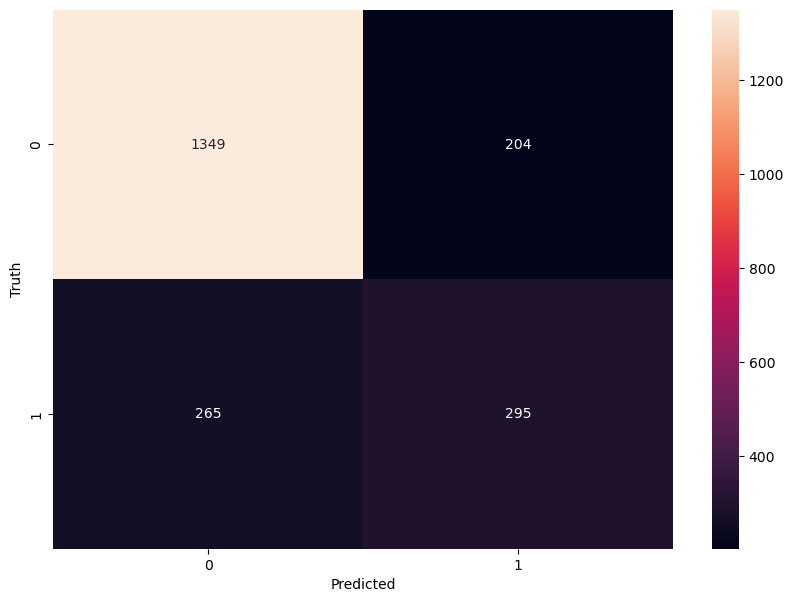

In [57]:
import seaborn as sn
import math

cm = tf.math.confusion_matrix(labels = y_test, predictions= y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')